In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import nltk
import re
import string
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ABC\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ABC\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ABC\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [4]:
df=pd.read_csv('spam.csv', encoding = "ISO-8859-1")
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [5]:
print('No. of Rows :',df.shape[0])
print('No. of Columns :',df.shape[1])
df.head(5)

No. of Rows : 5572
No. of Columns : 5


,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [6]:
# drop unnecssary last 3 columns
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [7]:
# Renameing columns v1 and v2
df.rename(columns={'v1':'Target', 'v2':'SMS'}, inplace = True)

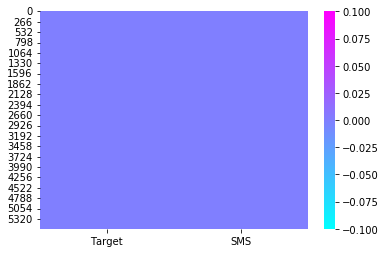

In [9]:
sns.heatmap(df.isnull(), cmap = 'cool')
plt.show()

In [10]:
df.isnull().sum().any()

False

In [11]:
df.duplicated().sum()

403

In [12]:
df.drop_duplicates(keep = 'first', inplace =True)

# Feature Extraction

In [13]:
df['No_of_characters'] = df['SMS'].apply(len)

In [14]:
df['No_of_word'] = df['SMS'].apply(lambda x:len(nltk.word_tokenize(x)))

In [15]:
df['No_of_sentences'] = df['SMS'].apply(lambda x:len(nltk.sent_tokenize(x)))

# EDA

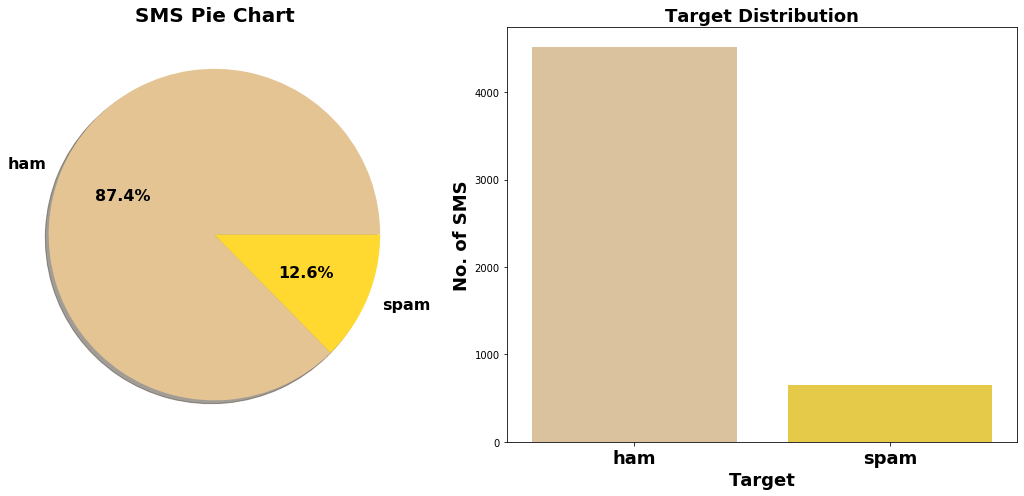

Value Counts of Target:


ham     4516
spam     653
Name: Target, dtype: int64

In [19]:
# Pie & Count plot of Ratings
plt.rcParams["figure.autolayout"] = True
sns.set_palette('Set2_r')
f,ax=plt.subplots(1,2,figsize=(15,7))
df['Target'].value_counts().plot.pie(autopct='%2.1f%%',
                                textprops ={'fontsize':16 ,'fontweight' :'bold'}, ax=ax[0],shadow=True)
ax[0].set_title('SMS Pie Chart', fontsize=20,fontweight ='bold')
ax[0].set_ylabel('')
sns.countplot(x='Target',data=df)
ax[1].set_title('Target Distribution',fontsize=18,fontweight ='bold')
ax[1].set_xlabel("Target",fontsize=18,fontweight ='bold')
ax[1].set_ylabel("No. of SMS",fontsize=18,fontweight ='bold')
plt.xticks(fontsize=18,fontweight ='bold')
plt.tight_layout()
plt.show()
print('Value Counts of Target:')
df['Target'].value_counts()

Around 87.4% SMS are HAM while 12.6% SMS are SPAM in nature.

In [20]:
df[df['Target'] == 'ham'][["No_of_characters",'No_of_word','No_of_sentences']].describe()

,No_of_characters,No_of_word,No_of_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,16.958370,1.815545
std,56.358207,13.395014,1.364098
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,219.000000,38.000000


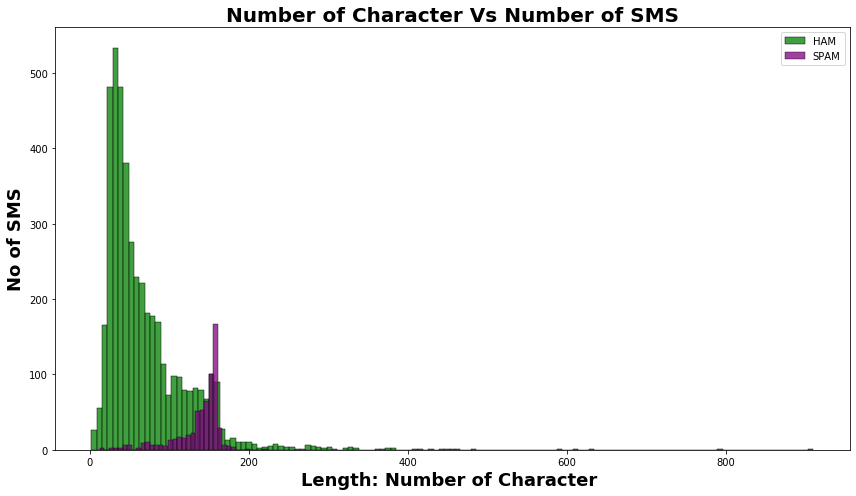

In [21]:
plt.figure(figsize=(12, 7))
g = sns.histplot(df["No_of_characters"][(df["Target"] == 'ham')], color="Green")
g = sns.histplot(df["No_of_characters"][(df["Target"] == 'spam')], ax =g, color="Purple")
g.set_xlabel("Length: Number of Character ", fontsize=18, fontweight = 'bold')
g.set_ylabel("No of SMS", fontsize=18, fontweight = 'bold')
plt.title('Number of Character Vs Number of SMS', fontsize=20, fontweight = 'bold')
g = g.legend(['HAM', 'SPAM'])
plt.show()

1. Number of character in Spam sms is comparetively much high than Non-Spam (ham) sms.
2. On average each ham sms contain 71 character, 17 words and 2 sentences.

In [22]:
df[df['Target'] == 'spam'][["No_of_characters",'No_of_word','No_of_sentences']].describe()

,No_of_characters,No_of_word,No_of_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.474732,2.969372
std,30.137753,6.893007,1.488910
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,44.000000,9.000000


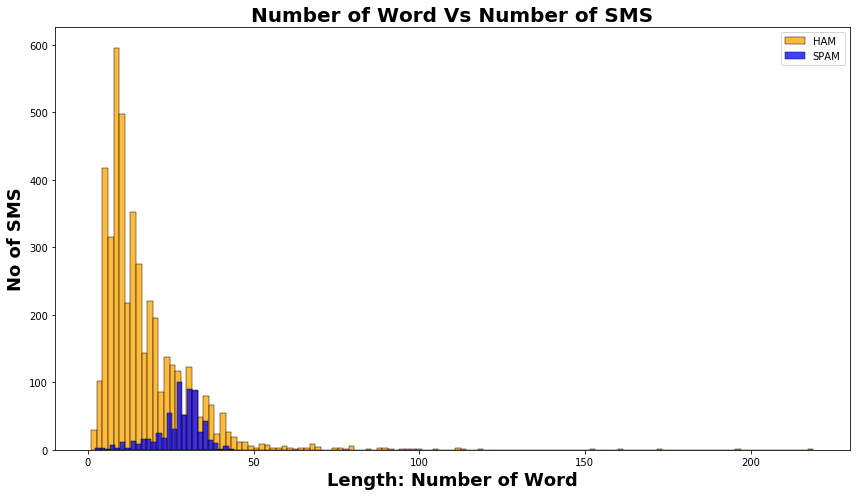

In [25]:
plt.figure(figsize=(12, 7))
g = sns.histplot(df["No_of_word"][(df["Target"] == 'ham')], color="orange")
g = sns.histplot(df["No_of_word"][(df["Target"] == 'spam')], ax =g, color="blue")
g.set_xlabel("Length: Number of Word", fontsize=18, fontweight = 'bold')
g.set_ylabel("No of SMS", fontsize=18, fontweight = 'bold')
plt.title('Number of Word Vs Number of SMS', fontsize=20, fontweight = 'bold')
g = g.legend(['HAM', 'SPAM'])
plt.show()

1. Number of Word in Spam sms is comparetively much high than Non-Spam (ham) sms.
2. On average each spam sms contain 138 character, 27 words and 3 sentences.

# Label Encoding of Target Variables

In [26]:
from sklearn.preprocessing import LabelEncoder
lb_encoder = LabelEncoder()

In [27]:
df['Target'] = lb_encoder.fit_transform(df['Target'])

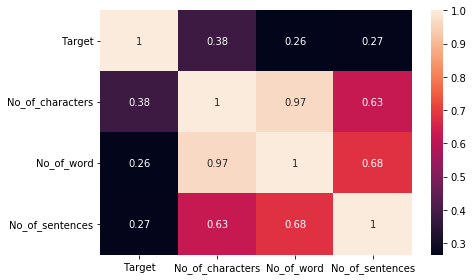

In [28]:
plt.figure(figsize=(7, 4))
sns.heatmap(df.corr(),annot=True)
plt.show()

# Text Mining

In [29]:
def clean_text(df, df_column_name):
    
    #Converting all messages to lowercase
    df[df_column_name] = df[df_column_name].str.lower()

    #Replace email addresses with 'email'
    df[df_column_name] = df[df_column_name].str.replace(r'^.+@[^\.].*\.[a-z]{2,}$','emailaddress')

    #Replace URLs with 'webaddress'
    df[df_column_name] = df[df_column_name].str.replace(r'^http\://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\S*)?$','webaddress')

    #Replace money symbols with 'dollars' (£ can by typed with ALT key + 156)
    df[df_column_name] = df[df_column_name].str.replace(r'£|\$', 'dollars')
      
    #Replace 10 digit phone numbers (formats include paranthesis, spaces, no spaces, dashes) with 'phonenumber'
    df[df_column_name] = df[df_column_name].str.replace(r'^\(?[\d]{3}\)?[\s-]?[\d]{3}[\s-]?[\d]{4}$','phonenumber')

    #Replace numbers with 'numbr'
    df[df_column_name] = df[df_column_name].str.replace(r'\d+(\.\d+)?', 'numbr')

    #Remove punctuation
    df[df_column_name] = df[df_column_name].str.replace(r'[^\w\d\s]', ' ')

    #Replace whitespace between terms with a single space
    df[df_column_name] = df[df_column_name].str.replace(r'\s+', ' ')

    #Remove leading and trailing whitespace
    df[df_column_name] = df[df_column_name].str.replace(r'^\s+|\s+?$', '')
    
    #Remove stopwords
    stop_words = set(stopwords.words('english') + ['u', 'ü', 'â', 'ur', '4', '2', 'im', 'dont', 'doin', 'ure'])
    df[df_column_name] = df[df_column_name].apply(lambda x: ' '.join(term for term in x.split() if term not in stop_words))

In [30]:
#Calling the class
clean_text(df, 'SMS')
df['SMS'].tail(3)

5569                                pity mood suggestions
5570    guy bitching acted like interested buying some...
5571                                       rofl true name
Name: SMS, dtype: object

# Top 20 Ham Word in SMS Corpus

In [33]:
ham_corpus = []
for i in df[df['Target'] == 0]['SMS'].tolist():
    for word in i.split():
        ham_corpus.append(word)

In [34]:
len(ham_corpus)

35163

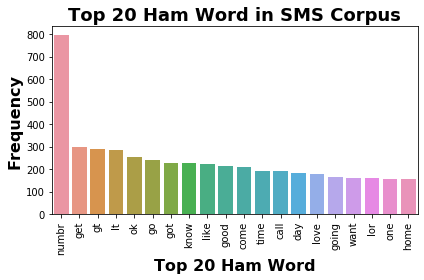

In [36]:
from collections import Counter
c= sns.barplot(x=pd.DataFrame(Counter(ham_corpus).most_common(20))[0],y=pd.DataFrame(Counter(ham_corpus).most_common(20))[1])
c.set_xlabel("Top 20 Ham Word", fontsize=16, fontweight = 'bold')
c.set_ylabel("Frequency", fontsize=16, fontweight = 'bold')
plt.title('Top 20 Ham Word in SMS Corpus', fontsize=18, fontweight = 'bold')
plt.xticks(rotation ='vertical')
plt.tight_layout()
plt.show()

# Top 20 Spam Word in SMS Corpus

In [37]:
spam_corpus = []
for i in df[df['Target'] == 1]['SMS'].tolist():
    for word in i.split():
        spam_corpus.append(word)

In [38]:
len(spam_corpus)

11345

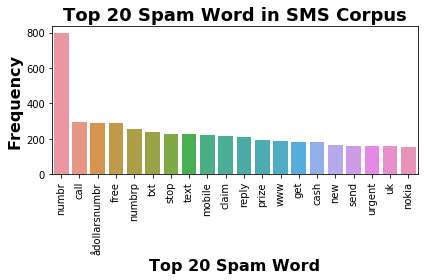

In [39]:
from collections import Counter
c= sns.barplot(x=pd.DataFrame(Counter(spam_corpus).most_common(20))[0],y=pd.DataFrame(Counter(ham_corpus).most_common(20))[1])
c.set_xlabel("Top 20 Spam Word", fontsize=16, fontweight = 'bold')
c.set_ylabel("Frequency", fontsize=16, fontweight = 'bold')
plt.title('Top 20 Spam Word in SMS Corpus', fontsize=18, fontweight = 'bold')
plt.xticks(rotation ='vertical')
plt.tight_layout()
plt.show()

# Text Vectorization to convert text into numeric

In [40]:
# Converting text into numeric using TfidfVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
tf = TfidfVectorizer(max_features=3000)
features = tf.fit_transform(df['SMS'])
X=features
Y=df[['Target']]

In [41]:
X.shape

(5169, 3000)

In [42]:
Y.shape

(5169, 1)

# Machine learning Model Building

In [44]:
#Importing Machine learning Model library
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import confusion_matrix,precision_score,classification_report,accuracy_score

In [45]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=99, test_size=.3)
print('Training feature matrix size:',X_train.shape)
print('Training target vector size:',Y_train.shape)
print('Test feature matrix size:',X_test.shape)
print('Test target vector size:',Y_test.shape)

Training feature matrix size: (3618, 3000)
Training target vector size: (3618, 1)
Test feature matrix size: (1551, 3000)
Test target vector size: (1551, 1)


In [46]:
#logistic Regression
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=99, test_size=.3)
log_reg=LogisticRegression()
log_reg.fit(X_train,Y_train)
y_pred=log_reg.predict(X_test)
print('\033[1m'+'Logistics Regression Evaluation'+'\033[0m')
print('\n')
print('\033[1m'+'Accuracy Score of Logistics Regression :'+'\033[0m', accuracy_score(Y_test, y_pred))
print('\n')
print('\033[1m'+'Precision Score of Logistics Regression :'+'\033[0m', precision_score(Y_test, y_pred))
print('\n')
print('\033[1m'+'Confusion matrix of Logistics Regression :'+'\033[0m \n',confusion_matrix(Y_test, y_pred))
print('\n')
print('\033[1m'+'classification Report of Logistics Regression'+'\033[0m \n',classification_report(Y_test, y_pred))

Logistics Regression Evaluation


Accuracy Score of Logistics Regression : 0.9645390070921985


Precision Score of Logistics Regression : 0.9863945578231292


Confusion matrix of Logistics Regression : 
 [[1351    2]
 [  53  145]]


classification Report of Logistics Regression 
               precision    recall  f1-score   support

           0       0.96      1.00      0.98      1353
           1       0.99      0.73      0.84       198

    accuracy                           0.96      1551
   macro avg       0.97      0.87      0.91      1551
weighted avg       0.97      0.96      0.96      1551



In [47]:
from sklearn.model_selection import cross_val_score
CVscore = cross_val_score(log_reg, X, Y, cv =5, scoring='precision')
print('\033[1m'+'Cross Validation Score', log_reg, ':'+'\033[0m\n')
print("Precision CVScore :" ,CVscore)
print("Mean CV Precision Score :",CVscore.mean())
print("Std deviation :",CVscore.std())

Cross Validation Score LogisticRegression() :

Precision CVScore : [0.95652174 0.98989899 0.98039216 0.95918367 0.95454545]
Mean CV Precision Score : 0.9681084027814023
Std deviation : 0.014307868003056655


In [48]:
#Random Forest Classifier
rfc=RandomForestClassifier()
rfc.fit(X_train,Y_train)
y_pred=rfc.predict(X_test)
print('\033[1m'+'Random Forest Classifier'+'\033[0m')
print('\n')
print('\033[1m'+'Accuracy Score of Random Forest Classifier :'+'\033[0m', accuracy_score(Y_test, y_pred))
print('\n')
print('\033[1m'+'Precision Score of Random Forest Classifier :'+'\033[0m', precision_score(Y_test, y_pred))
print('\n')
print('\033[1m'+'Confusion matrix of Random Forest Classifier :'+'\033[0m \n',confusion_matrix(Y_test, y_pred))
print('\n')
print('\033[1m'+'classification Report of Random Forest Classifier'+'\033[0m \n',classification_report(Y_test, y_pred))

Random Forest Classifier


Accuracy Score of Random Forest Classifier : 0.9825918762088974


Precision Score of Random Forest Classifier : 0.9885714285714285


Confusion matrix of Random Forest Classifier : 
 [[1351    2]
 [  25  173]]


classification Report of Random Forest Classifier 
               precision    recall  f1-score   support

           0       0.98      1.00      0.99      1353
           1       0.99      0.87      0.93       198

    accuracy                           0.98      1551
   macro avg       0.99      0.94      0.96      1551
weighted avg       0.98      0.98      0.98      1551



In [49]:
from sklearn.model_selection import cross_val_score
CVscore = cross_val_score(rfc, X, Y, cv =5, scoring='precision')
print('\033[1m'+'Cross Validation Score', rfc, ':'+'\033[0m\n')
print("CVScore :" ,CVscore)
print("Mean CV Precision Score :",CVscore.mean())
print("Std deviation :",CVscore.std())

Cross Validation Score RandomForestClassifier() :

CVScore : [0.99173554 0.99145299 0.98214286 0.98181818 1.        ]
Mean CV Precision Score : 0.9894299135208225
Std deviation : 0.0068143249580542384


In [50]:
#MultinomialNB
mnb = MultinomialNB()
mnb.fit(X_train,Y_train)
y_pred=mnb.predict(X_test)
print('\033[1m'+'MultinomialNB Classifier'+'\033[0m')
print('\n')
print('\033[1m'+'Accuracy Score of MultinomialNB Classifier :'+'\033[0m', accuracy_score(Y_test, y_pred))
print('\n')
print('\033[1m'+'Precision Score of MultinomialNB Classifier :'+'\033[0m', precision_score(Y_test, y_pred))
print('\n')
print('\033[1m'+'Confusion matrix of MultinomialNB Classifier :'+'\033[0m \n',confusion_matrix(Y_test, y_pred))
print('\n')
print('\033[1m'+'classification Report of MultinomialNB Classifier'+'\033[0m \n',classification_report(Y_test, y_pred))

MultinomialNB Classifier


Accuracy Score of MultinomialNB Classifier : 0.9825918762088974


Precision Score of MultinomialNB Classifier : 1.0


Confusion matrix of MultinomialNB Classifier : 
 [[1353    0]
 [  27  171]]


classification Report of MultinomialNB Classifier 
               precision    recall  f1-score   support

           0       0.98      1.00      0.99      1353
           1       1.00      0.86      0.93       198

    accuracy                           0.98      1551
   macro avg       0.99      0.93      0.96      1551
weighted avg       0.98      0.98      0.98      1551



In [51]:
from sklearn.model_selection import cross_val_score
CVscore = cross_val_score(mnb, X, Y, cv =5, scoring='precision')
print('\033[1m'+'Cross Validation Score', mnb, ':'+'\033[0m\n')
print("Precision CVScore :" ,CVscore)
print("Mean Precision CV Score :",CVscore.mean())
print("Std deviation :",CVscore.std())

Cross Validation Score MultinomialNB() :

Precision CVScore : [0.99152542 1.         1.         1.         0.97391304]
Mean Precision CV Score : 0.9930876934414149
Std deviation : 0.01013358607546182


In [52]:
#BernoulliNB
bnb = BernoulliNB()
bnb.fit(X_train,Y_train)
y_pred=bnb.predict(X_test)
print('\033[1m'+'BernoulliNB Classifier'+'\033[0m')
print('\n')
print('\033[1m'+'Accuracy Score of BernoulliNB Classifier :'+'\033[0m', accuracy_score(Y_test, y_pred))
print('\n')
print('\033[1m'+'Precision Score of BernoulliNB Classifier :'+'\033[0m', precision_score(Y_test, y_pred))
print('\n')
print('\033[1m'+'Confusion matrix of BernoulliNB Classifier :'+'\033[0m \n',confusion_matrix(Y_test, y_pred))
print('\n')
print('\033[1m'+'classification Report of BernoulliNB Classifier'+'\033[0m \n',classification_report(Y_test, y_pred))

BernoulliNB Classifier


Accuracy Score of BernoulliNB Classifier : 0.9877498388136686


Precision Score of BernoulliNB Classifier : 0.9890710382513661


Confusion matrix of BernoulliNB Classifier : 
 [[1351    2]
 [  17  181]]


classification Report of BernoulliNB Classifier 
               precision    recall  f1-score   support

           0       0.99      1.00      0.99      1353
           1       0.99      0.91      0.95       198

    accuracy                           0.99      1551
   macro avg       0.99      0.96      0.97      1551
weighted avg       0.99      0.99      0.99      1551



In [53]:
from sklearn.model_selection import cross_val_score
CVscore = cross_val_score(bnb, X, Y, cv =5, scoring='precision')
print('\033[1m'+'Cross Validation Score', bnb, ':'+'\033[0m\n')
print("Precision CVScore :" ,CVscore)
print("Mean Precision CV Score :",CVscore.mean())
print("Std deviation :",CVscore.std())

Cross Validation Score BernoulliNB() :

Precision CVScore : [0.99186992 0.98360656 0.97478992 0.99137931 1.        ]
Mean Precision CV Score : 0.9883291404774901
Std deviation : 0.008528340989098108


In [54]:
#Extra Tree Classifiers
etc = ExtraTreesClassifier()
etc.fit(X_train,Y_train)
y_pred=etc.predict(X_test)
print('\033[1m'+'Extra Trees Classifier'+'\033[0m')
print('\n')
print('\033[1m'+'Accuracy Score of Extra Trees Classifier :'+'\033[0m', accuracy_score(Y_test, y_pred))
print('\n')
print('\033[1m'+'Precision Score of Extra Trees Classifier :'+'\033[0m', precision_score(Y_test, y_pred))
print('\n')
print('\033[1m'+'Confusion matrix of Extra Trees Classifier :'+'\033[0m \n',confusion_matrix(Y_test, y_pred))
print('\n')
print('\033[1m'+'classification Report of Extra Trees Classifier'+'\033[0m \n',classification_report(Y_test, y_pred))

Extra Trees Classifier


Accuracy Score of Extra Trees Classifier : 0.9845261121856866


Precision Score of Extra Trees Classifier : 0.9887640449438202


Confusion matrix of Extra Trees Classifier : 
 [[1351    2]
 [  22  176]]


classification Report of Extra Trees Classifier 
               precision    recall  f1-score   support

           0       0.98      1.00      0.99      1353
           1       0.99      0.89      0.94       198

    accuracy                           0.98      1551
   macro avg       0.99      0.94      0.96      1551
weighted avg       0.98      0.98      0.98      1551



In [55]:
from sklearn.model_selection import cross_val_score
CVscore = cross_val_score(etc, X, Y, cv =5, scoring='precision')
print('\033[1m'+'Cross Validation Score', etc, ':'+'\033[0m\n')
print("Precision CVScore :" ,CVscore)
print("Mean Precision CV Score :",CVscore.mean())
print("Std deviation :",CVscore.std())

Cross Validation Score ExtraTreesClassifier() :

Precision CVScore : [0.99159664 0.99152542 0.97345133 0.98245614 0.98245614]
Mean Precision CV Score : 0.9842971341039316
Std deviation : 0.006781459664794296


In [56]:
#AdaBoost Classifier
adbc=AdaBoostClassifier()
adbc.fit(X_train,Y_train)
y_pred=adbc.predict(X_test)
print('\033[1m'+'AdaBoost Classifier Evaluation'+'\033[0m')
print('\n')
print('\033[1m'+'Accuracy Score of AdaBoost Classifier :'+'\033[0m', accuracy_score(Y_test, y_pred))
print('\n')
print('\033[1m'+'Precision Score of Extra Trees Classifier :'+'\033[0m', precision_score(Y_test, y_pred))
print('\n')
print('\033[1m'+'Confusion matrix of AdaBoost Classifier :'+'\033[0m \n',confusion_matrix(Y_test, y_pred))
print('\n')
print('\033[1m'+'classification Report of AdaBoost Classifier'+'\033[0m \n',classification_report(Y_test, y_pred))

AdaBoost Classifier Evaluation


Accuracy Score of AdaBoost Classifier : 0.97678916827853


Precision Score of Extra Trees Classifier : 0.9354838709677419


Confusion matrix of AdaBoost Classifier : 
 [[1341   12]
 [  24  174]]


classification Report of AdaBoost Classifier 
               precision    recall  f1-score   support

           0       0.98      0.99      0.99      1353
           1       0.94      0.88      0.91       198

    accuracy                           0.98      1551
   macro avg       0.96      0.93      0.95      1551
weighted avg       0.98      0.98      0.98      1551



In [57]:
from sklearn.model_selection import cross_val_score
CVscore = cross_val_score(adbc, X, Y, cv =5, scoring='precision')
print('\033[1m'+'Cross Validation Score',adbc, ':'+'\033[0m\n')
print("Precision CVScore :" ,CVscore)
print("Mean Precision CV Score :",CVscore.mean())
print("Std deviation :",CVscore.std())

Cross Validation Score AdaBoostClassifier() :

Precision CVScore : [0.9037037  0.95081967 0.90909091 0.90983607 0.95762712]
Mean Precision CV Score : 0.9262154938287196
Std deviation : 0.023066744592647244


In [58]:
#saving the best model
import pickle
pickle.dump(tf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))

In [62]:
#conclusion
filename='model.pkl'
loaded_model=pickle.load(open(filename,'rb'))
loaded_model.predict(X_test)
result=loaded_model.score(X_test,Y_test)
print(result*100)

98.25918762088975
